<a href="https://colab.research.google.com/github/sachsac/Feature-Importance-Identifiers/blob/main/Feature_Importance_Example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [36]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

In [37]:
KC_df = pd.read_csv('/content/drive/MyDrive/Coding Dojo/data set/kc_house_data.csv')
KC_df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [38]:
#assign target and features
y = KC_df['price']
X = KC_df.drop(columns = ['price', 'id', 'date'])

In [39]:
#traintest split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

#random forest 

In [40]:
rf = RandomForestRegressor(random_state=42)
rf

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

In [41]:
rf.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

In [42]:
print('Random Forest Training Scores:', r2_score(y_train, rf.predict(X_train)))
print('Random Forest Testing Scores:', r2_score(y_test, rf.predict(X_test)))

Random Forest Training Scores: 0.9822974687040884
Random Forest Testing Scores: 0.867119147433169


#Importance

##How it was done before 
Displayed as an array

In [43]:
rf.feature_importances_

array([0.00286812, 0.01046085, 0.25133288, 0.01360806, 0.00193086,
       0.02964955, 0.01061545, 0.00296464, 0.33616096, 0.02075849,
       0.00532124, 0.03731132, 0.00222625, 0.01509868, 0.15103039,
       0.06257352, 0.03294906, 0.01313967])

##Next Step of Elevation
Making our array match up with the feature in rows, by column keys.

Feature: 0, Score: 0.00287
Feature: 1, Score: 0.01046
Feature: 2, Score: 0.25133
Feature: 3, Score: 0.01361
Feature: 4, Score: 0.00193
Feature: 5, Score: 0.02965
Feature: 6, Score: 0.01062
Feature: 7, Score: 0.00296
Feature: 8, Score: 0.33616
Feature: 9, Score: 0.02076
Feature: 10, Score: 0.00532
Feature: 11, Score: 0.03731
Feature: 12, Score: 0.00223
Feature: 13, Score: 0.01510
Feature: 14, Score: 0.15103
Feature: 15, Score: 0.06257
Feature: 16, Score: 0.03295
Feature: 17, Score: 0.01314


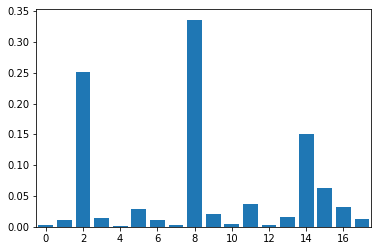

In [44]:
importance = rf.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance);
plt.xlim(-0.5,17.5); #code from https://machinelearningmastery.com/calculate-feature-importance-with-python/ for formatting

Looking online, the above was the easiest way I could find that would match up features with their scores (that example was with coefficients as importances).

In [45]:
#because the features were only identified via their column numbers (0- 17), I needed to display the features (X) to manually count to identify the columns by number.
X.head(1)
#highest importances: 8 is grade, 2 is sqftliving , 14 is latitude

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,3,1.0,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650


The grade and sqft of living area are the most important features. But it was a pain to manually count the features to see which was what; imagine if we had a dataframe with 20+ columns!

##My code
While attempting to help a classmate, I starting playing around with code and was able to find a way to create a minidataframe that would achieve what I was looking to do: identify the feature importances readily.

In [46]:
data = {'Feature': X.columns, 'Importance': rf.feature_importances_}
feature_importances = pd.DataFrame(data)
feature_importances

,Feature,Importance
0,bedrooms,0.002868
1,bathrooms,0.010461
2,sqft_living,0.251333
3,sqft_lot,0.013608
4,floors,0.001931
5,waterfront,0.029650
6,view,0.010615
7,condition,0.002965
8,grade,0.336161
9,sqft_above,0.020758


In [47]:
feature_importances['Importance'].sum()
#all feature importances should add up to close to 1

1.0000000000000002

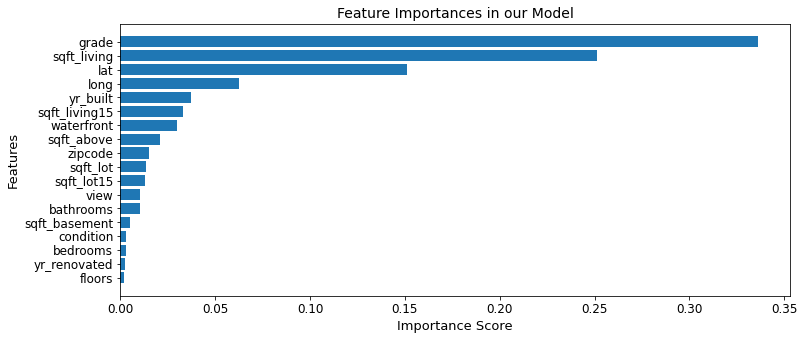

In [48]:
#once I shared my above code with TAs, I adapted code sent to me by one of them in order to graph the above, making it even easier to look at
rf_features = pd.DataFrame({'feature': X_train.columns, 'feature_importance': rf.feature_importances_})
rf_features.sort_values(by = 'feature_importance', inplace = True)

plt.figure(figsize = (12, 5))
plt.barh(rf_features['feature'], rf_features['feature_importance'])
plt.xlabel('Importance Score', fontsize = 13)
plt.xticks(fontsize = 12)
plt.ylabel('Features', fontsize = 13)
plt.yticks(fontsize = 12)
plt.title('Feature Importances in our Model', fontsize = 14);

My code in the last section above is a great way to make it easier to visualize and effortlessly identify which features are the most important to our models.

This works for any model which allows feature_importances_, i.e. Random Forests.